<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/HandlingImageData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap. 8 Handling Images**

In [ ]:
# Load Libreay
import cv2, matplotlib.pyplot as plt

In [ ]:
cv2.__version__

'4.1.2'

In [6]:
!git clone https://github.com/chrisalbon/sim_data.git

Cloning into 'sim_data'...
remote: Enumerating objects: 12747, done.
remote: Total 12747 (delta 0), reused 0 (delta 0), pack-reused 12747
Receiving objects: 100% (12747/12747), 13.40 MiB | 32.21 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [ ]:
image = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_GRAYSCALE)

(-0.5, 3599.5, 2269.5, -0.5)

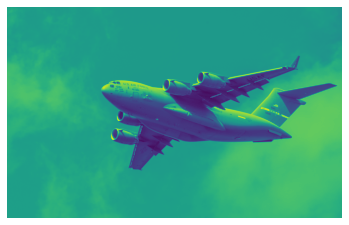

In [ ]:
# Show image first
plt.imshow(image); plt.axis('off')

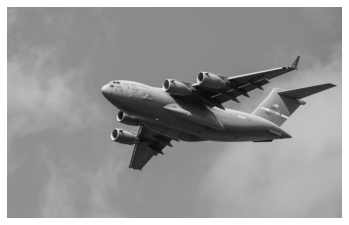

In [ ]:
# Show image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
# Show data type
type(image)

numpy.ndarray

In [ ]:
# Show dimensions
image.shape

(2270, 3600)

In [ ]:
# Show data
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [ ]:
# SHow first pixel
image[0, 0]

140

**Read image with color**

In [ ]:
# Load image in color
image_bgr = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_COLOR)

In [ ]:
# Show first pixel in color
image_bgr[0, 0]

array([195, 144, 111], dtype=uint8)

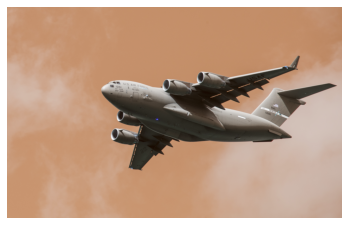

In [ ]:
# Show image color
plt.imshow(image_bgr); plt.axis('off'); plt.show()

**Convert image**

In [ ]:
# Convert image
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

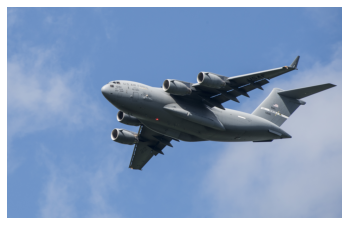

In [ ]:
# Show image
plt.imshow(image_rgb); plt.axis('off'); plt.show()

## 8.2 Saving Images

**Problem**

You want to save an image for preprocessing.

**Solution**

Use OpenCV’s imwrite :

In [ ]:
#Load image as grayscale
image = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Save image
cv2.imwrite('sim_data/images/plane_new.jpg', image)

True

## Resizing Images

**Problem**

You want to resize an image for further preprocessing.

**Solution**

Use resize to change the size of an image:

In [ ]:
# Load image as grayscale
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

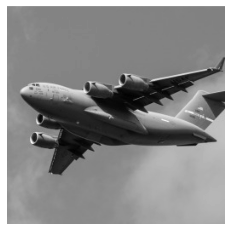

In [ ]:
# Show the image loaded
plt.imshow(image, cmap='gray'); plt.axis('off'); plt.show()

**Resizing image**

In [ ]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

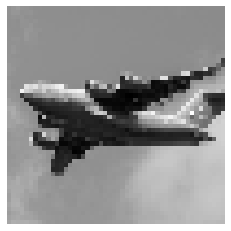

In [ ]:
# View the image resized
plt.imshow(image_50x50, cmap='gray'); plt.axis('off'); plt.show()

## 8.4 Cropping Images

**Problem**

You want to remove the outer portion of the image to change its dimensions.

**Solution**

The image is encoded as a two-dimensional NumPy array, so we can crop the image
easily by slicing the array:

In [ ]:
# Load image in grayscaled
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Show the image dimension
image.shape

(256, 256)

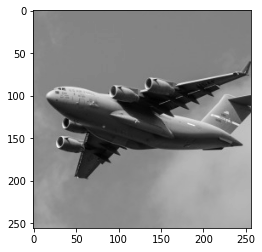

In [ ]:
# Show image without cropping
plt.imshow(image, cmap='gray')

**Cropping Image**

In [ ]:
# Select the first half of the columns and all rows
image_cropped = image[:, :128]

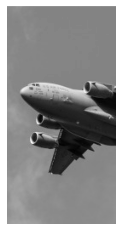

In [ ]:
# Show the image part cropped
plt.imshow(image_cropped, cmap='gray'); plt.axis("off"); plt.show()

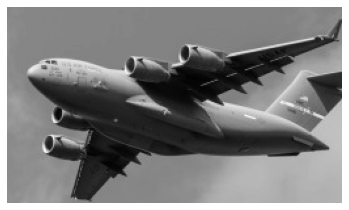

In [ ]:
# Cropping image
plt.imshow(image[50:200, :], cmap='gray'); plt.axis('off'); plt.show()

## 8.5 Blurring Images(Bruiller les images)


**Problem**

You want to smooth out an image.

**Solution**

To blur an image, each pixel is transformed to be the average value of its neighbors.
This neighbor and the operation performed are mathematically represented as a ker‐
nel (don’t worry if you don’t know what a kernel is). The size of this kernel deter‐
mines the amount of blurring, with larger kernels producing smoother images. Here
we blur an image by averaging the values of a 5 × 5 kernel around each pixel:

In [ ]:
# Load image as grayscale
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

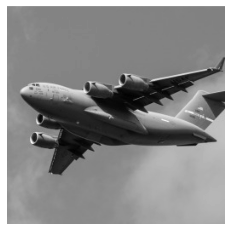

In [ ]:
# Show image without blurring
plt.imshow(image, cmap='gray'); plt.axis('off'); plt.show()

**Blurring image**

In [ ]:
# Blur image
image_blurry = cv2.blur(image, (5, 5))

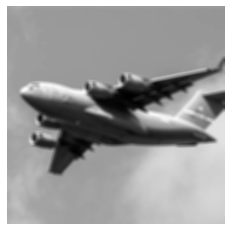

In [ ]:
# Show image blurry
plt.imshow(image_blurry, cmap='gray'); plt.axis("off"); plt.show()

In [ ]:
# Blur image
image_very_blurry = cv2.blur(image, (100, 100))

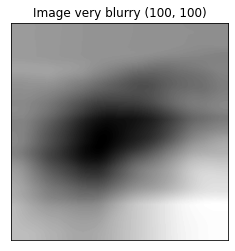

In [ ]:
# Show image very blurry
plt.imshow(image_very_blurry, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Image very blurry (100, 100)')
plt.show()

Les noyaux sont largement utilisés dans le traitement d'image pour tout faire, de l'accentuation à
détection des bords, et reviendra à plusieurs reprises dans ce chapitre. Le noyau flou que nous
utilisé ressemble à ceci:

In [ ]:
# Load libray
import numpy as np, pandas as pd

In [ ]:
# Create kernel
kernel = np.ones((5, 5)) / 25.0

In [ ]:
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

L'élément central du noyau est le pixel examiné, tandis que les éléments restants sont ses voisins. Puisque tous les éléments ont la même valeur (normalisée pour s'additionner
à 1), chacun a son mot à dire dans la valeur résultante du pixel d'intérêt. Nous pouvons appliquer manuellement un noyau à une image en utilisant filter2D pour produire un effet de flou similaire :

In [ ]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

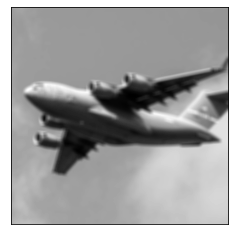

In [ ]:
# Show image kernel
plt.imshow(image_kernel, cmap='gray');# plt.axis('off'); plt.show()
plt.xticks([])
plt.yticks([])
plt.show()

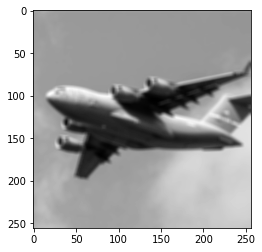

In [ ]:
plt.imshow(cv2.blur(image, (5, 5)), cmap='gray')

## 8.6 Sharpening Images(Aiguiser une image)(Rendre l'image plus nette)

**Problem**

You want to sharpen an image.

**Solution**

Create a kernel that highlights the target pixel. Then apply it to the image using fil
ter2D :

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, cv2

In [ ]:
# Load image
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

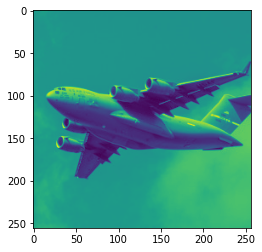

In [ ]:
# Show image read
plt.imshow(image)

In [ ]:
# Create kernel
kernel = np.array([
                   [0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [ ]:
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

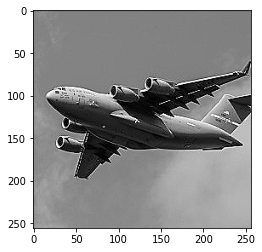

In [ ]:
# Show sharpen image
plt.imshow(image_sharp, cmap='gray')

La **netteté** fonctionne de la même manière que le flou, sauf qu'au lieu d'utiliser un noyau pour faire la moyenne
les valeurs voisines, nous avons construit un noyau pour mettre en évidence le pixel lui-même. le
l'effet résultant fait ressortir davantage les contrastes des bords dans l'image.

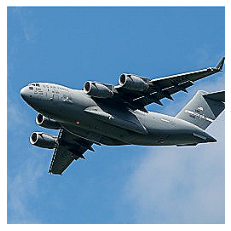

In [ ]:
# Voici l'image nette
# Read image
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_COLOR)

#Sharpen the image
image_sharp = cv2.filter2D(image, -1, kernel)

# Convert the image color
image_cvt_color = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB)

# SHow the image
plt.imshow(image_cvt_color); plt.axis('off'); plt.show()

## 8.7 Enhancing Contrast(Améliorer, Augmenter le contrast)

**Problem**

We want to increase the contrast between pixels in an image.

**Solution**

Histogram equalization is a tool for image processing that can make objects and
shapes stand out. When we have a grayscale image, we can apply OpenCV’s equali
zeHist directly on the image(L'égalisation d'histogramme est un outil de traitement d'image qui peut faire ressortir les objets et les formes. Lorsque nous avons une image en niveaux de gris, nous pouvons appliquer l'equali zeHist d'OpenCV directement sur l'image) :

In [ ]:
# Load image
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

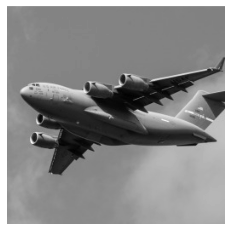

In [ ]:
# Show image without enhancing
plt.imshow(image, cmap="gray"); plt.axis('off'); plt.show()

In [ ]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)

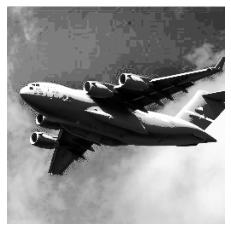

In [ ]:
# Show image
plt.imshow(image_enhanced, cmap='gray'); plt.axis('off'); plt.show()

**Enhancing image with color**

Cependant, lorsque nous avons une image en couleur, nous devons d'abord convertir l'image en YUV
forme couleur. Le Y est le luma, ou la luminosité, et U et V désignent la couleur. Après
la conversion, nous pouvons appliquer equalizeHist à l'image, puis la reconvertir en
BGR ou RVB :

In [ ]:
# Load image
image = cv2.imread('sim_data/images/plane.jpg')

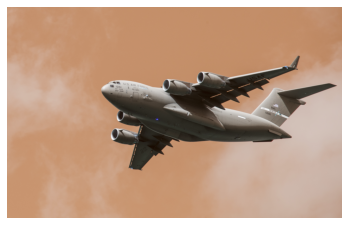

In [ ]:
# Show image first
plt.imshow(image); plt.axis('off'); plt.show()

In [ ]:
# Convert to YUV
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

In [ ]:
image_yuv.shape

(2270, 3600, 3)

In [ ]:
# Slice the image yuv
image_yuv_reshape = image_yuv[:, :, 0].copy()

In [ ]:
# Apply equalizeHist to image YUV
image_yuv_equalized = cv2.equalizeHist(image_yuv_reshape)

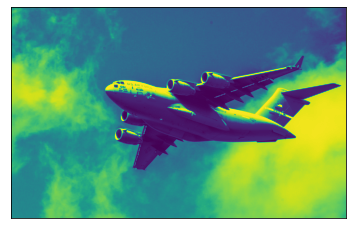

In [ ]:
# Show image YUV equalize
plt.imshow(image_yuv_equalized); plt.xticks([]); plt.yticks([]); plt.show()

## Isolating Color


**Problem**

You want to isolate a color in an image.

**Solution**

Define a range of colors and then apply a mask to the image:

**HSV(Hue Saturation Values)(TSV: Teinte Saturation Valeur):** est un mode des couleurs basé sur la perception de couleurs sous trois composantes: Teinte, Saturation et Valeur.

* **Saturation**: C'est l'intensité de la couleur
* **Valeur**: C'est la brouillance de l'image

In [11]:
import cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt

In [12]:
# Load image
image_bgr = cv2.imread('sim_data/images/plane_256x256.jpg')

In [13]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

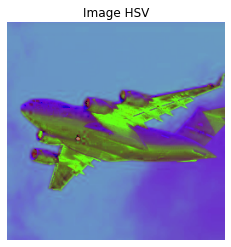

In [14]:
# Show image hsv
plt.imshow(image_hsv); plt.axis('off'); plt.title("Image HSV"); plt.show()

In [15]:
# Define the range of blues values
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

In [16]:
# Create a mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

In [17]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [18]:
# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

In [19]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

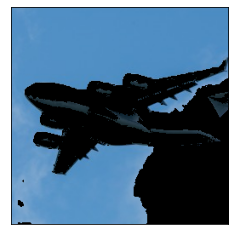

In [20]:
# Show the isolated color
plt.imshow(image_rgb, cmap='gray'); plt.xticks([]); plt.yticks([]); plt.show()

(-0.5, 255.5, 255.5, -0.5)

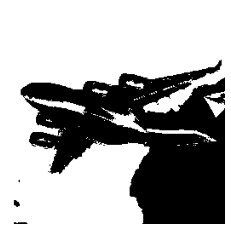

In [21]:
# Show image mask
plt.imshow(mask, cmap='gray'); plt.axis("off")